# The collective notebook contained Nada and Menna's work

## Most of preprocessing is done by Nada  
## Most of the EDA graphs is done by Menna  
## The main models by Nada  
## The fine tuning by Menna  
## All presentations were a collaboration between us

### Our work strategy was that both of us did everything and then collected what was best, so each of us had points of power to add to this collective notebook.


In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('final_internship_data.csv')

df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [5]:
#drop nulls
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499995 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            499995 non-null  object 
 1   User Name          499995 non-null  object 
 2   Driver Name        499995 non-null  object 
 3   Car Condition      499995 non-null  object 
 4   Weather            499995 non-null  object 
 5   Traffic Condition  499995 non-null  object 
 6   key                499995 non-null  object 
 7   fare_amount        499995 non-null  float64
 8   pickup_datetime    499995 non-null  object 
 9   pickup_longitude   499995 non-null  float64
 10  pickup_latitude    499995 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    499995 non-null  int64  
 14  hour               499995 non-null  int64  
 15  day                499995 non-null  int64  
 16  month  

In [7]:
#check duplicates
duplicates = df.duplicated()
duplicates_count = duplicates.sum()
print(f"Number of duplicate rows: {duplicates_count}")

Number of duplicate rows: 0


In [9]:
#display number of trips per user
trips_per_user = df['User ID'].value_counts()
print(trips_per_user)

User ID
KHVrEVlD    1
OoKo64GB    1
Phl9pRbO    1
Gg8lXxrJ    1
wVg86OTk    1
           ..
M8lPpDO2    1
4NtMOqM1    1
sJHWgXSJ    1
TwGHXQ7C    1
qGKn4Um5    1
Name: count, Length: 499995, dtype: int64


In [11]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

df['minute'] = df['pickup_datetime'].dt.minute

print(df)

         User ID          User Name       Driver Name Car Condition Weather  \
0       KHVrEVlD     Kimberly Adams        Amy Butler     Very Good   windy   
1       lPxIuEri       Justin Tapia  Hannah Zimmerman     Excellent  cloudy   
2       gsVN8JLS    Elizabeth Lopez    Amanda Jackson           Bad  stormy   
3       9I7kWFgd      Steven Wilson          Amy Horn     Very Good  stormy   
4       8QN5ZaGN  Alexander Andrews  Cassandra Larson           Bad  stormy   
...          ...                ...               ...           ...     ...   
499995  er7Luy6J       Morgan Smith   Gabriel Coleman           Bad   rainy   
499996  FWDZu9NA     Dillon Jackson    Larry Richards     Very Good   rainy   
499997  QZIMcpLZ  Michael Rodriguez    Lonnie Santana           Bad   rainy   
499998  AD72Uwmn       Deborah Soto      Emily Rivera          Good  stormy   
499999  qGKn4Um5         Eric Jones        Julie King     Very Good   sunny   

        Traffic Condition                          

In [13]:
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,minute
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897,26
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217,52
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961,35
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905,30
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703,51


In [15]:
#drop not needed columns
df = df.drop(columns=['User ID','User Name','Driver Name','key','pickup_datetime'])

In [17]:
df.head()

,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,minute
0,Very Good,windy,Congested Traffic,4.5,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897,26
1,Excellent,cloudy,Flow Traffic,16.9,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217,52
2,Bad,stormy,Congested Traffic,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961,35
3,Very Good,stormy,Flow Traffic,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905,30
4,Bad,stormy,Congested Traffic,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703,51


In [19]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Car Condition', 'Weather', 'Traffic Condition']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoder if you need to inverse later

df.head()

,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,minute
0,3,4,0,4.5,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897,26
1,1,0,2,16.9,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217,52
2,0,2,0,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961,35
3,3,2,2,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905,30
4,0,2,0,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703,51


In [20]:
df.describe()

,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,minute
count,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,1.501225,1.998988,0.999444,11.358182,-1.265714,0.696742,-1.265755,0.696675,1.683445,13.510843,15.684239,6.268617,3.042020,2011.739129,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145,29.553972
std,1.118552,1.413478,0.816600,9.916069,0.206934,0.140906,0.205903,0.128997,1.307391,6.511596,8.681092,3.437798,1.949243,1.860897,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548,17.333130
min,0.000000,0.000000,0.000000,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593,0.000000
25%,1.000000,1.000000,0.000000,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721,14.000000
50%,2.000000,2.000000,1.000000,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442,30.000000
75%,3.000000,3.000000,2.000000,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769,45.000000
max,3.000000,4.000000,2.000000,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593,59.000000


In [21]:
#count all fare amount that is negative
negative_fair_count = (df['fare_amount'] < 0).sum()
print(f"Number of negative fair amounts: {negative_fair_count}")

#display them
negative_fares = df[df['fare_amount'] < 0]
print("Negative fare amounts:")
print(negative_fares[['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']])

Number of negative fair amounts: 21
Negative fare amounts:
        fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
2039           -2.9         -1.287869         0.709363          -1.287855   
2486           -2.5         -1.291544         0.710709          -1.291540   
13032          -3.0         -1.291457         0.711060          -1.291472   
28839          -2.5         -1.287796         0.709449           0.000000   
36722          -2.5         -1.290709         0.711922          -1.290672   
42337          -5.0         -1.291386         0.711326          -1.291209   
56748          -5.0         -1.291191         0.711104          -1.291216   
58937         -44.9         -1.289294         0.711639          -1.285898   
97838          -3.0         -1.290030         0.711505          -1.290059   
102938         -2.9         -1.291034         0.711805          -1.291080   
165147         -2.5         -1.291232         0.711634          -1.291231   
179311         -3

In [22]:
#check outliers

def outlier_check():
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        print(f"Outliers in {column}:")
        print(outliers.shape[0])


outlier_check()

Outliers in fare_amount:
43329
Outliers in pickup_longitude:
33965
Outliers in pickup_latitude:
23701
Outliers in dropoff_longitude:
35805
Outliers in dropoff_latitude:
30748
Outliers in passenger_count:
56526
Outliers in hour:
0
Outliers in day:
0
Outliers in month:
0
Outliers in weekday:
0
Outliers in year:
0
Outliers in jfk_dist:
59285
Outliers in ewr_dist:
28380
Outliers in lga_dist:
22539
Outliers in sol_dist:
18610
Outliers in nyc_dist:
21940
Outliers in distance:
41925
Outliers in bearing:
0


In [31]:
# Fare: remove negatives, clip extreme high
df = df[df['fare_amount'] >= 0]
df['fare_amount'] = df['fare_amount'].clip(upper=100)  # Optional cap (adjust as needed)

# Distance-related features (clip top 99th percentile)
distance_features = ['distance', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist']
for col in distance_features:
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(upper=upper)


# Valid passenger count: 1 to 6
df = df[df['passenger_count'].between(0, 6)]


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df.head()

,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,minute
0,3,4,0,4.5,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897,26
1,1,0,2,16.9,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217,52
2,0,2,0,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961,35
3,3,2,2,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905,30
4,0,2,0,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703,51


## EDA

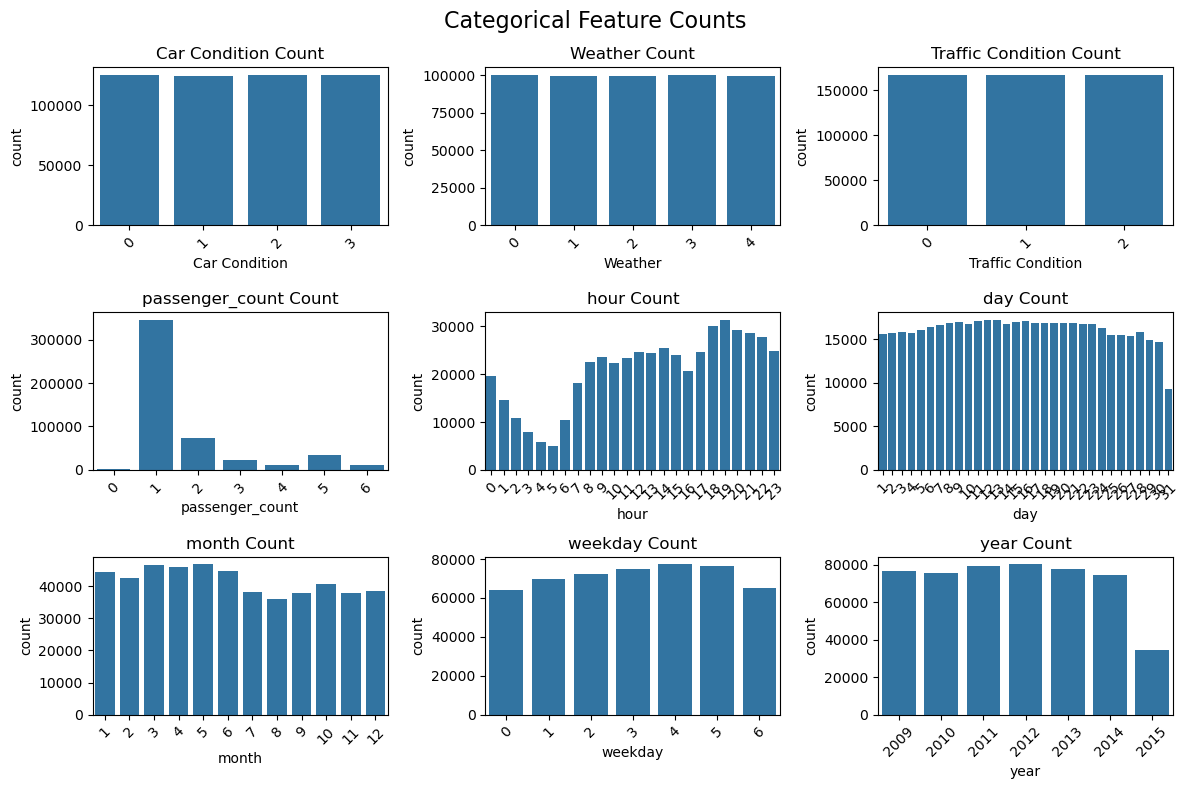

In [38]:
categorical_cols = ['Car Condition', 'Weather', 'Traffic Condition', 'passenger_count', 'hour', 'day', 'month', 'weekday', 'year']

fig, axes = plt.subplots(3, 3, figsize=(12, 8))
for ax, col in zip(axes.flatten(), categorical_cols):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'{col} Count')
    ax.tick_params(axis='x', rotation=45)
plt.suptitle("Categorical Feature Counts", fontsize=16)
plt.tight_layout()
plt.show()


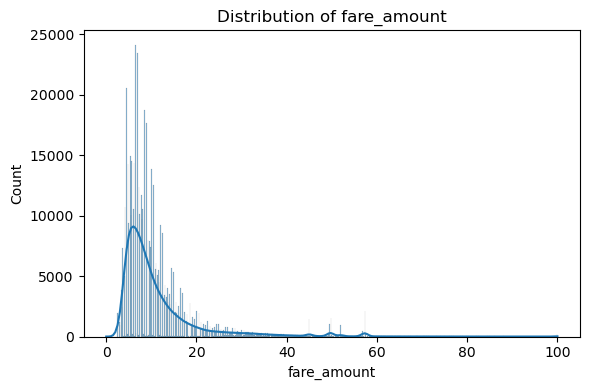

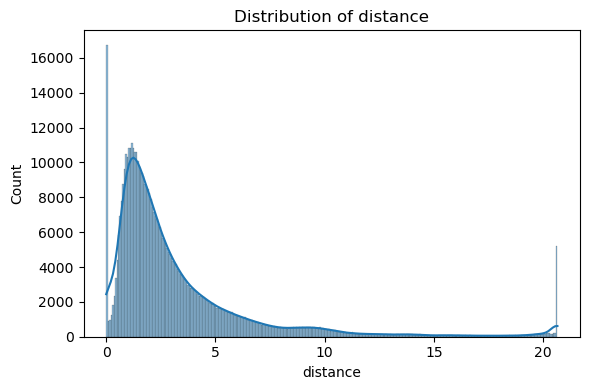

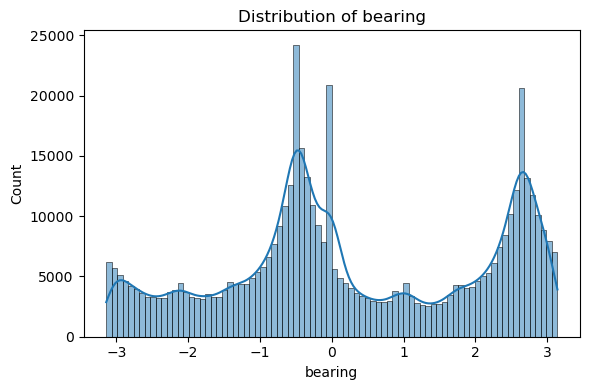

In [40]:
numeric_cols = ['fare_amount', 'distance', 'bearing']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


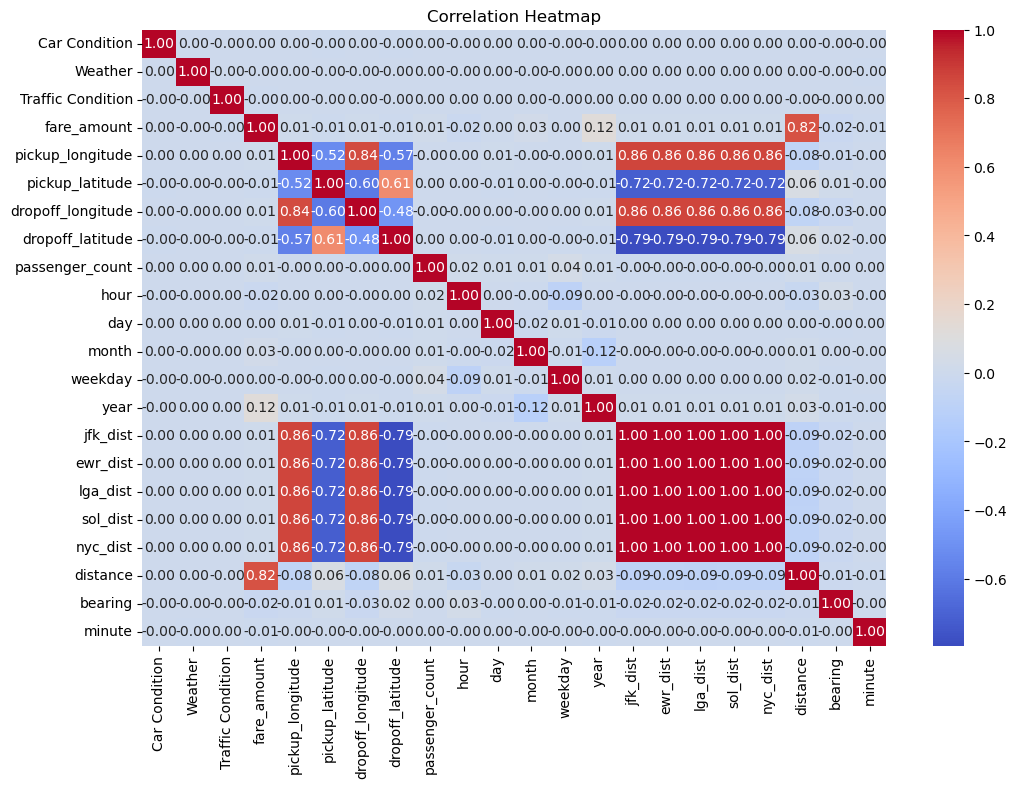

In [42]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [44]:
corr

,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,minute
Car Condition,1.000000,7.161890e-04,-0.001170,0.003037,0.000844,-0.003629,0.001104,-0.002788,0.001089,-0.001390,0.000946,0.001421,-0.000625,-4.125673e-05,0.002025,0.002031,0.002029,0.002030,0.002030,0.002287,-0.000684,-0.000902
Weather,0.000716,1.000000e+00,-0.001775,-0.000508,0.000738,-0.001298,-0.000355,-0.000918,0.000650,-0.001017,0.000160,-0.000515,-0.001419,8.986305e-07,0.000129,0.000127,0.000133,0.000127,0.000127,0.000108,-0.002245,-0.003965
Traffic Condition,-0.001170,-1.774914e-03,1.000000,-0.002793,0.001781,-0.001019,0.002365,-0.000407,0.000024,0.000879,0.000501,0.000532,-0.000449,2.207016e-04,0.001467,0.001462,0.001458,0.001463,0.001461,-0.001618,-0.002045,0.001710
fare_amount,0.003037,-5.083871e-04,-0.002793,1.000000,0.008301,-0.007402,0.008394,-0.007176,0.014983,-0.019619,0.002052,0.025214,0.003487,1.188730e-01,0.006869,0.008611,0.007926,0.008559,0.008720,0.824418,-0.024624,-0.009181
pickup_longitude,0.000844,7.378611e-04,0.001781,0.008301,1.000000,-0.522516,0.839814,-0.571361,-0.002501,0.000229,0.006303,-0.000545,-0.000488,5.538253e-03,0.861946,0.861952,0.861946,0.861951,0.861950,-0.077452,-0.014921,-0.001193
pickup_latitude,-0.003629,-1.297590e-03,-0.001019,-0.007402,-0.522516,1.000000,-0.604795,0.611900,0.001566,0.002636,-0.005169,0.002931,-0.003461,-7.252102e-03,-0.721062,-0.721045,-0.721062,-0.721048,-0.721050,0.060720,0.012415,-0.000294
dropoff_longitude,0.001104,-3.549463e-04,0.002365,0.008394,0.839814,-0.604795,1.000000,-0.484795,-0.001754,-0.001026,0.004104,-0.001149,0.001014,7.490795e-03,0.862420,0.862434,0.862424,0.862431,0.862430,-0.079436,-0.025525,-0.000886
dropoff_latitude,-0.002788,-9.176183e-04,-0.000407,-0.007176,-0.571361,0.611900,-0.484795,1.000000,0.001432,0.002482,-0.006554,0.003011,-0.003202,-8.915055e-03,-0.794908,-0.794908,-0.794918,-0.794905,-0.794906,0.063810,0.021534,-0.001059
passenger_count,0.001089,6.503416e-04,0.000024,0.014983,-0.002501,0.001566,-0.001754,0.001432,1.000000,0.015750,0.005327,0.005325,0.037346,5.883615e-03,-0.003039,-0.003032,-0.003017,-0.003031,-0.003028,0.013249,0.001508,0.002291
hour,-0.001390,-1.017212e-03,0.000879,-0.019619,0.000229,0.002636,-0.001026,0.002482,0.015750,1.000000,0.002350,-0.003155,-0.088873,2.232721e-03,-0.001443,-0.001519,-0.001511,-0.001497,-0.001509,-0.030948,0.031444,-0.001717


fare_amount is strongly correlated with distance.

pickup_longitude, pickup_latitude, dropoff_longitude, and dropoff_latitude are highly correlated with distance-related columns (jfk_dist, ewr_dist, ...)indicating GPS-based distances are effective predictors.

Features like Weather, Car Condition, and Traffic Condition have very weak correlations with fare, suggesting they may not significantly influence fare prediction.

The year has a moderate correlation with fare_amount (0.12), perhaps due to inflation or changing fare policies.



In [47]:
selected_columns = [
    'distance',          
    'year',              
    'month',          
    'pickup_longitude', 
    'pickup_latitude',
    'dropoff_longitude',
    'dropoff_latitude'
]

# Create a new DataFrame with these columns + target
df_model = df[selected_columns + ['fare_amount']]


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df_model.drop(columns=['fare_amount'])
y = df_model['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

#grid search
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,                 # 3-fold cross-validation
    scoring='neg_mean_absolute_error',  # minimize MAE
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")



In [47]:
#train linear regression
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


y_pred = linear_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error: 2.51
Mean Squared Error: 28.02
R^2 Score: 0.70


In [49]:
#train random forest 
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model

y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error: 1.94
Mean Squared Error: 16.64
R^2 Score: 0.82


In [ ]:
from sklearn.svm import SVC
scv_model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_pred = scv_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.2f}")


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and values to try
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

# Set up the grid search
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,                 # 3-fold cross-validation
    scoring='neg_mean_absolute_error',  # minimize MAE
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# ----------------------------------------
# ✅ Visualization: plot top results
results = pd.DataFrame(grid_search.cv_results_)

# خدي top 10 بس عشان الرسم يكون أوضح
top_results = results.nsmallest(10, 'mean_test_score')

plt.figure(figsize=(10,5))
sns.barplot(
    data=top_results,
    x='mean_test_score',
    y=top_results.index,
    palette='viridis'
)
plt.xlabel('Negative Mean Absolute Error (lower is better)')
plt.ylabel('Model Configurations')
plt.title('Top Hyperparameter Combinations')
plt.show()
